In [13]:
library(ggpubr)
library("ggExtra")

Loading required package: ggplot2

Loading required package: magrittr



# Clinical Data from Aberdeen Cohort

In [1]:
Aber_additional_var <- read.csv("./data_sources/AdditionalCovariatesAberdeen.csv")
head(Aber_additional_var)

,Basename,smokingScore,PlasmaBlast,CD8pCD28nCD45RAn,CD8.naive,CD4.naive,CD8T,CD4T,NK,Bcell,Mono,Gran,cloz
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3998567027_R01C01,13.076251,1.748857,12.453208,153.5598,449.9774,0.08930741,0.12998327,0.02912801,0.02741193,0.08193897,0.6071240,NA
2,3998567027_R02C01,11.166418,1.802734,13.861751,159.9287,427.5157,0.03183639,0.11270767,0.06277872,0.02924390,0.09537986,0.6377389,NA
3,3998567027_R03C01,11.094193,1.628653,12.059060,190.0643,482.3159,0.03133318,0.12593794,0.01476804,0.02936250,0.06535940,0.7088081,1
4,3998567027_R04C01,14.373015,1.922215,16.537051,192.9703,282.5089,0.04313376,0.07832868,0.04027046,0.04581906,0.06070829,0.7314893,NA
5,3998567027_R05C01,15.883060,1.893910,6.951288,213.0875,413.8030,0.05330391,0.10086438,0.00000000,0.09904410,0.05068844,0.6843186,NA
6,3998567027_R06C01,9.698782,1.752264,9.085465,215.9612,512.3938,0.03009161,0.11830703,0.02959263,0.04685475,0.06949262,0.6931092,1


In [2]:
Aber_clinical_var <- read.csv("./data_sources/Aberdeen/OPCRIT_Oct_2020_GSK_barcode.csv",stringsAsFactors = FALSE)
Aber_clinical_var <- na.omit(Aber_clinical_var)

In [3]:
head(Aber_clinical_var)

,X...uid,currentmedication,chlorpromazine_equiv,barcode,otherbarcodes,studyid,opcritnumber,opcritnum_adjust,gsk_barcode,gid_duke,⋯,medicalproblems,everbeenonclozapine,dosage,stillonclozapine,ifnoreasonwhystopped,datebloodtaken,broad_sample_id,broad_sample_barcode,broad_rack_barcode,broad_rack_pos
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,1,clozapine 300mg venlafaxine 150mg hyocine 300mcg ethyl epa 4g,600,AA01Z50,GSK0019,19,19,19,,536716,⋯,Sometimes problems walking - ?water on knee,yes,300mg,yes,n/a,20-Jan-03,SM-31I6,33262451,AA024WM,B5
3,3,"clozapine, 900mg daily",1800,AA01Z54,GSK0021 / unk46,21,21,21,,536814,⋯,punctured lung- 1989,yes,900mgs daily,yes,,21-Jan-03,SM-31EC,12766857,AA01SCP-B,C5
4,4,"clozapine- 350mgs daily, fluoxetine-60mgs daily, omeprazole 20mgs daily, docusate sodium 100mgs daily, salbutamol (prn) and symbicort inhalers, temazepam 20mgs daily, prn norethisterone 15mgs daily, migraine tablets, prn",700,AA01Z57,GSK0023,23,23,23,,536839,⋯,none,yes,350mgs daily,yes,,27-Jan-03,SM-32N8,12766881,AA01ZZZ,49
5,5,dothiepin 225mg risperidone 4mg nitrazepam 5mg,267,AA01Z5A,GSK0026 / unk98,26,26,26,,536629,⋯,Systolic murmer noted 28/08/96,no,n/a,n/a,n/a,4-Feb-03,SM-31JE,33261899,AA024WN,H5
6,6,clopixol 600mg im fortnightly quinie sulphate 300mg aspirin 75mg procyclidine 15mgs check with cpn,400,AA01Z6R,GSK0028 / unk63,28,28,28,,536620,⋯,Severe peripheral vascular disease Duodenal Ulcer - vagotomy (1983) Hiatus Hernia (1984) - sick all the time Impaired hearing and arthritis Low blood pressure and irregular heartbeat.,yes,NV,no,Poor compliance,18-Mar-03,SM-31G5,33261643,AA024WJ,E12
7,7,olanzapine 10mgs,200,AA01Z72,GSK0048,48,48,48,,536676,⋯,,no,,,,17-Mar-03,SM-31FJ,33262236,AA024WI,D6


In [4]:
Aber_Risk_Dist <- read.csv("./Aber_Risk_Distance.csv")
Aber_PRS <- read.csv("./Aber_PRS.csv")
Aber_PRS_RD <- merge(Aber_PRS,Aber_Risk_Dist,by="Basename")
Aber_PRS_RD$catagory <- as.factor(Aber_PRS_RD$catagory)
head(Aber_PRS_RD)

,Basename,SCORE,catagory,predictedRD
,<fct>,<dbl>,<fct>,<dbl>
1,100973330060_R01C01,-11.407329,0,-0.7140185
2,100973330060_R02C01,-8.039477,1,2.2179896
3,100973330060_R02C02,-8.817386,1,0.5010194
4,100973330060_R03C01,-8.549088,1,0.2281152
5,100973330060_R03C02,-13.378361,0,-0.8905151
6,100973330060_R04C01,-6.889162,1,1.9034231


In [5]:
RD_cutoff <- mean(Aber_PRS_RD[Aber_PRS_RD$catagory==0,]$predictedRD) + sd(Aber_PRS_RD[Aber_PRS_RD$catagory==0,]$predictedRD)
PRS_cutoff <- mean(Aber_PRS_RD[Aber_PRS_RD$catagory==0,]$SCORE) + sd(Aber_PRS_RD[Aber_PRS_RD$catagory==0,]$SCORE)

In [6]:
Aber_ID <- read.table("./GEO/E-GEOD-84727.sdrf.txt",header = T)
head(Aber_ID)

,sample_title,status,id
,<int>,<int>,<fct>
1,7466509,1,3998567074_R03C01
2,7466544,1,3998928042_R02C02
3,7466550,2,3998952104_R02C02
4,7466555,1,100973330060_R05C02
5,7466568,1,3999356048_R03C01
6,7466582,1,3998567045_R03C02


In [7]:
Aber_ID <- merge(Aber_ID,Aber_Risk_Dist,by.x="id",by.y="Basename")
Aber_ID_Clinical_var <- merge(Aber_ID,Aber_clinical_var,by.x="sample_title",by.y="broad_sample_barcode")

In [8]:
Aber_ID_Clinical_var_addnl <- merge(Aber_ID_Clinical_var,Aber_additional_var,by.x="id",by.y="Basename")

In [9]:
Aber_ID_Clinical_var_addnl_PRS_RD <- merge(Aber_ID_Clinical_var_addnl,Aber_PRS_RD,by.x="id",by.y="Basename")

In [10]:
Aber_ID_Clinical_var_addnl_PRS_RD$predictedRD <- Aber_ID_Clinical_var_addnl_PRS_RD$predictedRD.x

In [11]:
cor.test(Aber_ID_Clinical_var_addnl_PRS_RD$chlorpromazine_equiv,
    Aber_ID_Clinical_var_addnl_PRS_RD$predictedRD,
    method = "spearman")

Warning message in cor.test.default(Aber_ID_Clinical_var_addnl_PRS_RD$chlorpromazine_equiv, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  Aber_ID_Clinical_var_addnl_PRS_RD$chlorpromazine_equiv and Aber_ID_Clinical_var_addnl_PRS_RD$predictedRD
S = 3804401, p-value = 0.4527
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04442371 


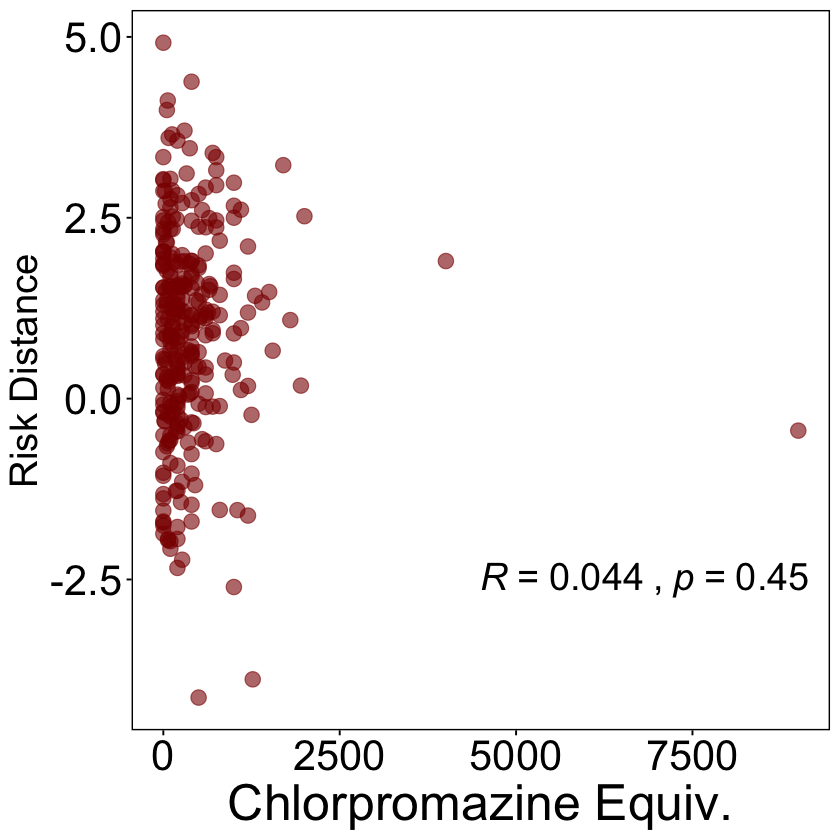

In [16]:
ggscatter(Aber_ID_Clinical_var_addnl_PRS_RD,
         y="predictedRD",x="chlorpromazine_equiv",size = 4, alpha = 0.6,color="darkred") + border() +
stat_cor(method = "spearman", label.y = -2.5, label.x = 4500,size=8)+ylab("Risk Distance")+
xlab("Chlorpromazine Equiv.")+ font("ylab",size=23) + font("xlab",size=30) + font("xy.text", size = 25)

In [17]:
temp_data <- Aber_ID_Clinical_var_addnl_PRS_RD[c("chlorpromazine_equiv","predictedRD")]
temp_data$medication_prescribed <- as.factor(ifelse(temp_data$chlorpromazine_equiv>0,"Yes","No"))

Warning message:
"`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


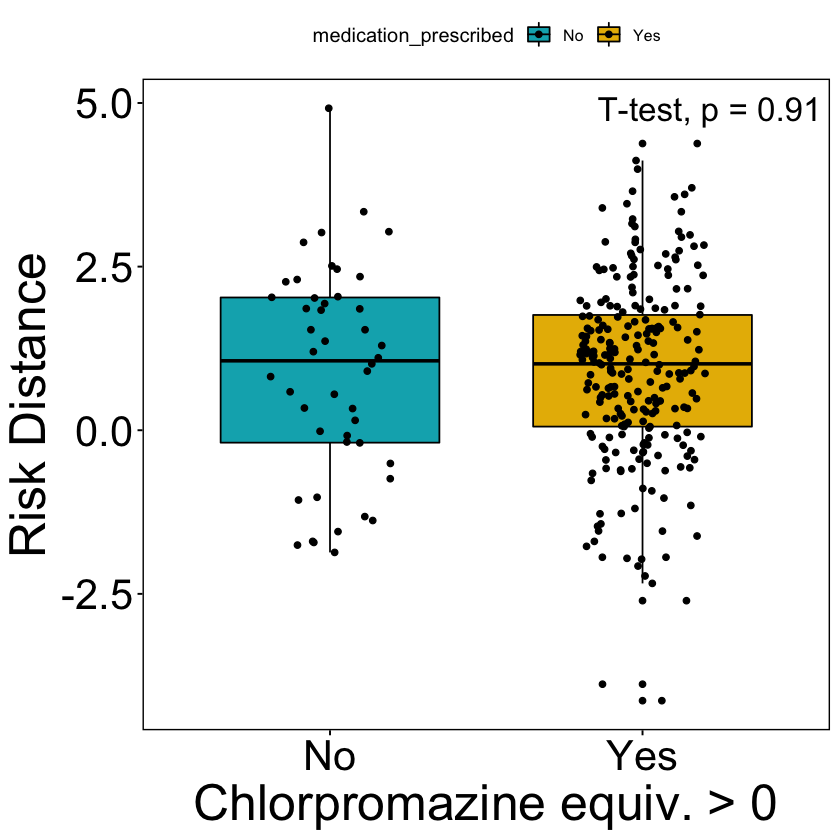

In [18]:
ggboxplot(temp_data,x = "medication_prescribed",y="predictedRD",add = "jitter",
fill="medication_prescribed", palette = c("#00AFBB", "#E7B800")) + 
stat_compare_means(method = "t.test",paired = FALSE,label.x = "Yes",size=7)+
xlab("Chlorpromazine equiv. > 0")+
ylab("Risk Distance") + border() + 
font("xlab",size=30) + font("ylab",size=30) + font("xy.text",size = 25)

# Clinical Data from London Cohort

In [28]:
UCL_medication_info <- read.csv("./data_sources/UCL/ucl_clozapine_all_sources_25sept2020.csv")
UCL_ID <- read.table("./GEO/UCL_sample_ids.txt",sep="\t",header = T)
UCL_medication_info <- merge(UCL_medication_info,UCL_ID,by.x="id",by.y="sample_title")
dim(UCL_medication_info)
UCL_ID <- UCL_ID[UCL_ID$case_control=="disease status: 2",]

[1] 151   4

In [29]:
UCL_medication_info$clozapine_all_sources <- 
            as.factor(
                ifelse(UCL_medication_info$clozapine_all_sources==2,"Clozapine","Other Drug")
                    )

In [30]:
cases_no_medication <- UCL_ID[!(UCL_ID$sample_description %in% UCL_medication_info$sample_description  ),]

In [31]:
dim(cases_no_medication)
table(UCL_medication_info$clozapine_all_sources)

[1] 202   3


 Clozapine Other Drug 
        59         91 

In [32]:
UCL_RD <- read.csv("./UCL_Risk_Distance.csv")
UCL_medication_RD <- merge(UCL_medication_info,UCL_RD,by.x = "sample_description",by.y="Basename")

In [33]:
head(UCL_medication_RD)

,sample_description,id,clozapine_all_sources,case_control,predictedRD,Y,catagory
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>
1,9741779020_R05C01,S2323,Other Drug,disease status: 2,2.070112,1,Positive
2,9741779020_R05C02,S2157,Other Drug,disease status: 2,1.380972,1,Positive
3,9741779024_R01C02,S2103,Other Drug,disease status: 2,1.276849,1,Positive
4,9741779024_R03C02,S0043,Other Drug,disease status: 2,-1.953696,1,Positive
5,9741779055_R01C02,S2144,Other Drug,disease status: 2,1.446638,1,Positive
6,9741779055_R03C02,S2203,Other Drug,disease status: 2,5.104296,1,Positive


In [34]:
temp <- UCL_medication_RD[UCL_medication_RD$clozapine_all_sources=="Other Drug",]

In [35]:
temp <- merge(cases_no_medication,UCL_RD,by.x="sample_description",by.y="Basename")

In [36]:
temp <- na.omit(temp)

In [37]:
dim(temp[temp$predictedRD>=RD_cutoff,])
dim(temp[temp$predictedRD<RD_cutoff,])

[1] 139   6

[1] 63  6

In [38]:
Clozapine <- c(17,42)
Other <- c(30,61)
None <- c(63,139)
data <- data.frame(Clozapine,Other,None)
rownames(data) <- c("Risk Distance < Cutoff","Risk Distance >= Cutoff")

In [39]:
df2 <- data.frame(supp=rep(c("Risk Distance < Cutoff", "Risk Distance >= Cutoff"), each=3),
   dose=rep(c("Clozapine", "Other Drugs", " None"),2),
   len=c(17,30,63,42,61,139))
df2

supp,dose,len
<fct>,<fct>,<dbl>
Risk Distance < Cutoff,Clozapine,17
Risk Distance < Cutoff,Other Drugs,30
Risk Distance < Cutoff,None,63
Risk Distance >= Cutoff,Clozapine,42
Risk Distance >= Cutoff,Other Drugs,61
Risk Distance >= Cutoff,None,139


Warning message:
"`arrange_()` is deprecated as of dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


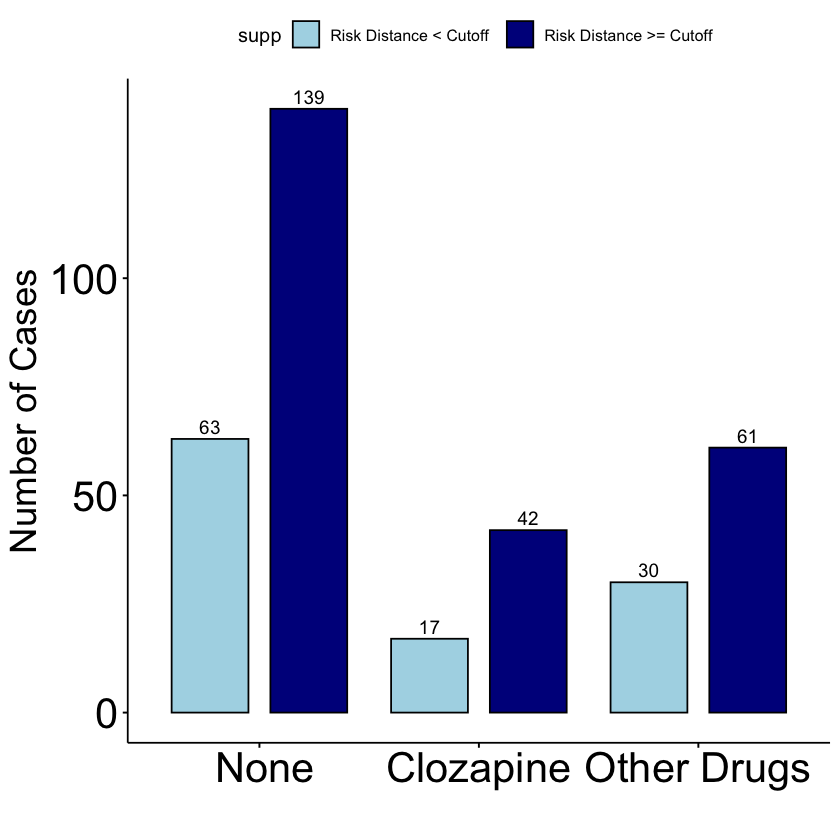

In [40]:
p <- ggbarplot(df2, "dose", "len",
  fill = "supp", palette = c("lightblue","darkblue"),
  label = TRUE,
  position = position_dodge(0.9))+ylab("Number of Cases") + xlab("")

p <- p+
font("title", size = 24, color = "red", face = "bold.italic")+
 font("subtitle", size = 20, color = "orange")+
 font("caption", size = 20, color = "orange")+
 font("xlab", size = 22, color = "black")+
 font("ylab", size = 22, color = "black")+
 font("xy.text", size = 25, color = "black")
p

In [41]:
df <- data.frame(dose=c("A", "B", "C"),
   len=c(139/63, 42/17,61/30 ))

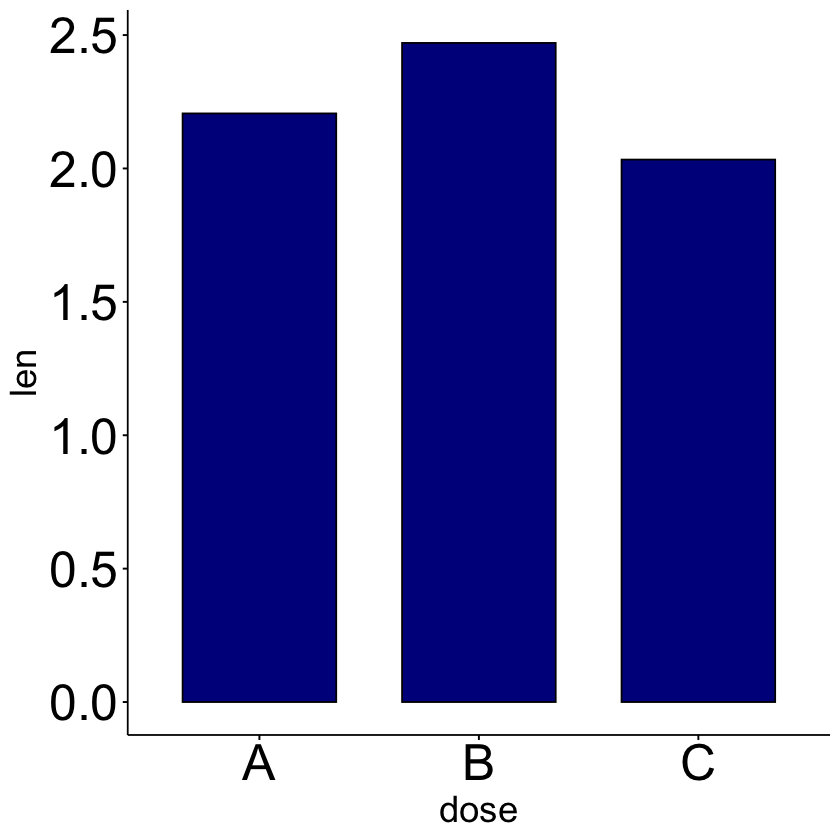

In [42]:
library(ggpubr)
p <- ggbarplot(df, "dose", "len",
 fill = "darkblue", color = "black")
p <- p+
font("title", size = 24, color = "red", face = "bold.italic")+
 font("subtitle", size = 20, color = "orange")+
 font("caption", size = 20, color = "orange")+
 font("xlab", size = 22, color = "black")+
 font("ylab", size = 22, color = "black")+
 font("xy.text", size = 30, color = "black")
p



